In [1]:
using NPZ
using Glob
using Eirene
using PyCall
using PyPlot

mpl = pyimport("mpl_toolkits.mplot3d");
macro bash_str(s) open(`bash`,"w",stdout) do io; print(io, s); end; end;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11929372662953272514\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3008515703804341349\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11929372662953272514\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
parent_dir = "/mnt/storage_volume/data/Greco_Ca_Analysis"
filepath = parent_dir * "/" *  
                "mmc_phate_all_hyperstack_190105_16-36-21_green_900frames_ALL_CELLS_plus.mat.npy";

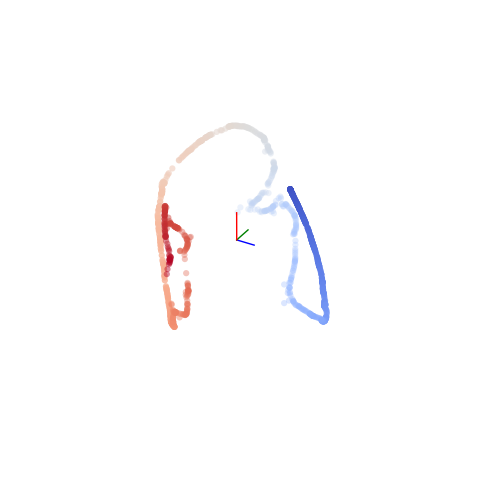

In [3]:
traj = npzread(filepath)
num_pts = size(traj)[1]
plt_lims = maximum(traj) - minimum(traj)
ax_len = 0.1*plt_lims

fig = figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(traj[:,1],traj[:,2],traj[:,3], c=1:num_pts, edgecolor="None", cmap="coolwarm")
ax.plot3D([0,ax_len], [0,0], [0,0])
ax.plot3D([0,0], [0,ax_len], [0,0])
ax.plot3D([0,0], [0,0], [0,ax_len])
xticks([])
yticks([])
zticks([])
axis("off")
show()

In [4]:
pers_diag = eirene(transpose(traj), model="pc", maxdim=1)
H0 = barcode(pers_diag, dim=0);
H1 = barcode(pers_diag, dim=1);
dim0_betti_curve = betticurve(pers_diag, dim=0);
dim1_betti_curve = betticurve(pers_diag, dim=1);

In [5]:
function plot_pers_diag(dim0barcode, dim1barcode)
    
    @assert dim0barcode[end,2] == Inf
    
    pad = 0.0025
    max_eps = maximum([maximum(dim0barcode[1:end-1,:]), maximum(dim1barcode)])
    
    figure(figsize=(4,4), dpi=300)
    plot(dim0barcode[:,1], dim0barcode[:,2], "ob", markersize=4, markeredgecolor="None", alpha=0.5)
    plot(dim1barcode[:,1], dim1barcode[:,2], "or", markersize=4, markeredgecolor="None", alpha=0.5)
    
    plot([0.0, max_eps+pad], [0.0, max_eps+pad], "k--", linewidth=0.5)
    xlim([-pad, max_eps+pad])
    ylim([-pad, max_eps+pad])
    show()
    
end;

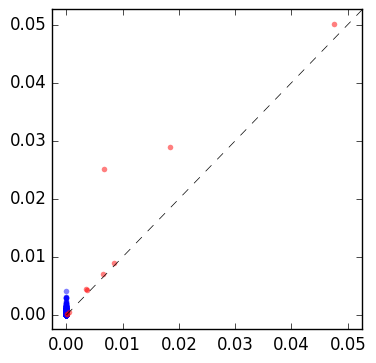

In [6]:
plot_pers_diag(H0, H1)

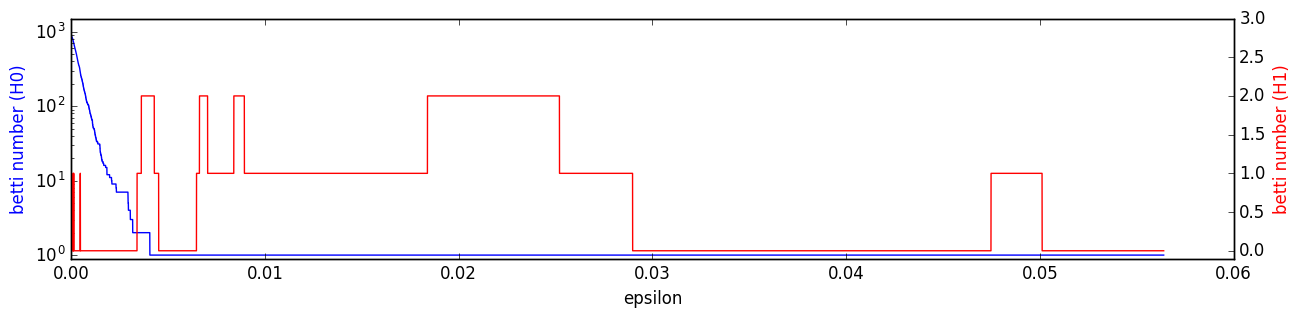

In [7]:
fig,ax = plt.subplots(figsize=(15,3))

ax.plot(dim0_betti_curve[:,1], dim0_betti_curve[:,2], "b-", label="H0")
ax.set_xlabel("epsilon")
ax.set_ylabel("betti number (H0)", color="blue")
ax.set_yscale("log")
ax.set_ylim([1-0.1, 1500])

ax2 = ax.twinx()
ax2.plot(dim1_betti_curve[:,1], dim1_betti_curve[:,2], "r-", label="H1")
ax2.set_ylabel("betti number (H1)", color="red")
ax2.set_ylim([-0.1, 3])
show()

In [8]:
H1_persistence = H1[:,2] - H1[:,1]
sort_idx = sortperm(H1_persistence, rev=false)
H1_barcode_sorted = H1_persistence[sort_idx];

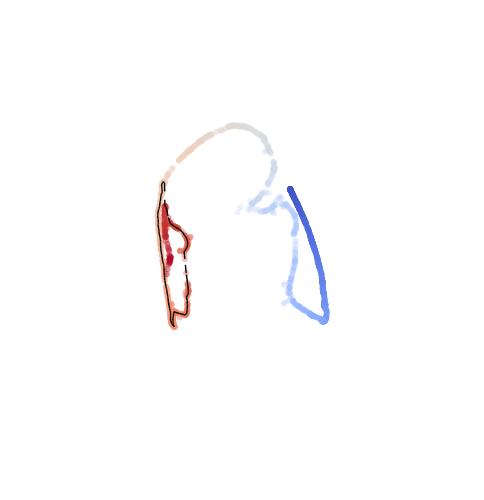

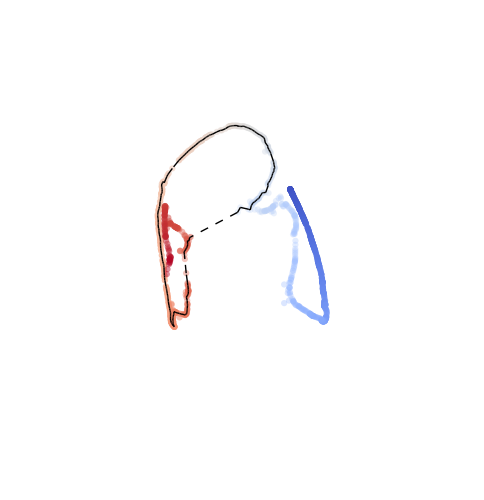

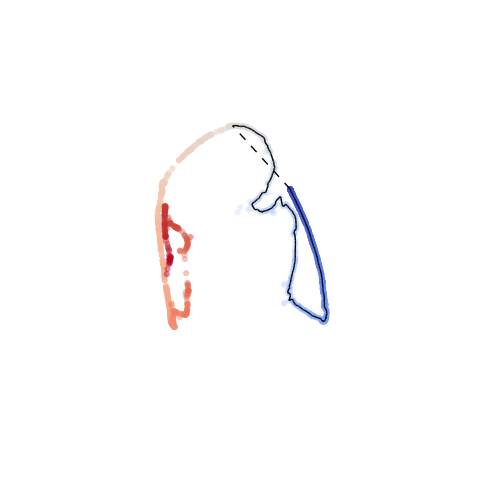

In [9]:
@assert size(H1)[1] > 2

for cycle_idx in 1:3
    
    cycle_rep = classrep(pers_diag, dim=1, class=sort_idx[end-cycle_idx+1])
    num_pts_cycle = size(cycle_rep)[2]
    
    fig = figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter3D(traj[:,1],traj[:,2],traj[:,3], c=1:num_pts, edgecolor="None", cmap="coolwarm")
    for seg in 1:num_pts_cycle 
        seg_x = [traj[cycle_rep[1,seg],1], traj[cycle_rep[2,seg],1]]
        seg_y = [traj[cycle_rep[1,seg],2], traj[cycle_rep[2,seg],2]]
        seg_z = [traj[cycle_rep[1,seg],3], traj[cycle_rep[2,seg],3]]
        ax.plot3D(seg_x, seg_y, seg_z, "k--")
    end
    xticks([])
    yticks([])
    zticks([])
    axis("off")
    show()
    
end